# Notebook to generate plots for the ACL Paper 
> The notebook contains most all the code required to recreate the plots from the paper

- skip_exec: true

In [ ]:
!pip install -Uqq fastcore

     |████████████████████████████████| 56 kB 2.4 MB/s 


In [ ]:
from fastcore import *
from fastcore.xtras import *
from pathlib import Path

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
organized_labels = ['DeCLUTR Base','DeCLUTR Small', 'InferSent FastText', 'InferSent GloVe','DistilBERT', 'RoBERTa', 'USE', 'Lexical Weights']

One can change the path of the folder containing these embeddings, so in this case, it would be `A Christmas Carol`, `Heart of Darkness`, `Metamorphosis` and `The Prophet`. 

The additional number in the beginning is only added to sort the files in the required order. 

In [ ]:
files = globtastic('/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet', file_glob='*.npy')
files = sorted(files)
files

['/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/1the prophet_cleaned_dcltr_base.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/2the prophet_cleaned_dcltr_sm.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/3the prophet_cleaned_if_FT.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/4the prophet_cleaned_if_glove.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/5the prophet_cleaned_distil.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/6the prophet_cleaned_roberta.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/7the prophet_cleaned_use.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/the prophet/8the prophet_cleaned_lexical_wt_ssm.npy']

In [ ]:
def label(arg):
    """
    Returns the full name of the model based on the abbreviation
    """
    switcher = {
        'dcltr_base': "DeCLUTR Base",
        'dcltr_sm': "DeCLUTR Small",
        'distil': "DistilBERT",
        'if_FT': "InferSent FastText",
        'if_glove': "InferSent GloVe",
        'roberta': "RoBERTa",
        'use': "USE",
        'new_lex': 'Lexical Vectors',
        'old_lex': 'Lexical Weights',
        'lexical_wt': 'Lexical Weights',
        'lexical_wt_ssm': 'Lexical Weights',
        'lex_vect': 'Lexical Vectors',
        'lex_vect_corr_ts': 'Lexical Vectors (Corr)'
    }
    return switcher.get(arg)

def normalize(data: np.ndarray) -> np.ndarray:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm

(647, 647)


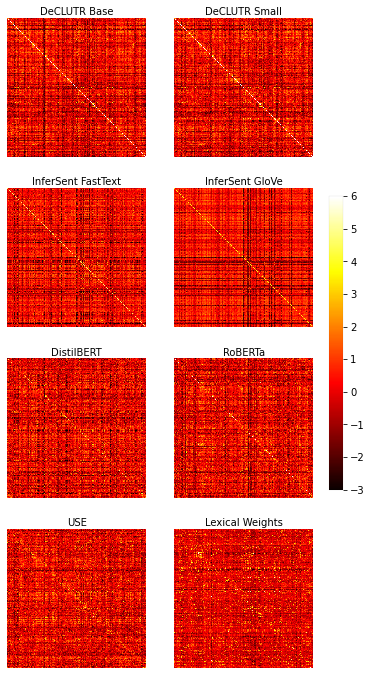

In [ ]:
# plt.figure(figsize = (4, 8))
d = {}
fig, axes = plt.subplots(4, 2, figsize = (6, 12))
axes = axes.flatten()
cmap=cm.get_cmap('hot')
normalizer=Normalize(-3,6)
im=cm.ScalarMappable(norm=normalizer, cmap=cmap)
for i, f in enumerate(files):
    f = Path(f)
    fname = f.stem.split('_cleaned_')
    book, method = fname[0], label(fname[1])
            
    title = f'{book.title()} {method}'
    
    em = np.load(f)
    # plt.subplot(4, 2, i + 1 )
    # if start == 0:
    #     start = 1
    
    # if end == -1:
    #     end = len(em)
        
        
    # ticks = np.linspace(1, len(em), 5, dtype=int)
    # labels = np.linspace(1, len(em), 5, dtype=int)

    if fname[1] == 'lexical_wt_ssm':
        sim = em
        print(em.shape)
        n = normalize(sim)
        np.fill_diagonal(sim, 1)
    else:
        sim = cosine_similarity(em, em)
        n = normalize(sim)
    
    
    numerator = n - np.mean(n)
    denominator = np.sqrt(np.sum(numerator**2) / (numerator.size - 1) )

    ab1 = numerator / denominator
    d[method] = ab1.flatten()
    axes[i].set_title(method, fontdict={'fontsize':10}, pad=3) #
    sns.heatmap(ab1, cmap=cmap, #[400:500, 400:500]
                 vmin=-3, vmax=6, square=True, #
                xticklabels=False, yticklabels=False, cbar=False, ax=axes[i])
    # plt.yticks(ticks, labels, rotation = 0)
    # break
    del em, sim, n, numerator, denominator, ab1

fig.subplots_adjust(right=1)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar( im, ax=axes.ravel().tolist(), pad=0.04, shrink=0.45, )
cb.outline.set_linewidth(0.05)

plt.savefig('pro.png', dpi = 300, bbox_inches='tight')

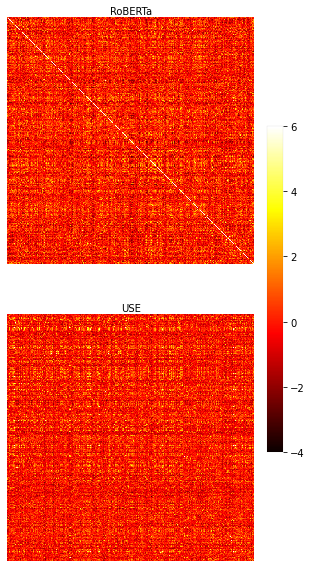

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (5, 10))
axes = axes.flatten()
cmap=cm.get_cmap('hot')
normalizer=Normalize(-4,6)
im=cm.ScalarMappable(norm=normalizer, cmap=cmap)
for i, f in enumerate(files[5:7]):
    f = Path(f)
    fname = f.stem.split('_cleaned_')
    book, method = fname[0], label(fname[1])
            
    title = f'{book.title()} {method}'
    
    em = np.load(f)
    # plt.subplot(2, 1, i + 1 )
    # if start == 0:
    #     start = 1
    
    # if end == -1:
    #     end = len(em)
        
        
    # ticks = np.linspace(1, len(em), 5, dtype=int)
    # labels = np.linspace(1, len(em), 5, dtype=int)

    if fname[1] == 'lexical_wt_ssm':
        sim = em
        print(em.shape)
        n = normalize(sim)
        np.fill_diagonal(sim, 1)
    else:
        sim = cosine_similarity(em, em)
        n = normalize(sim)
    
    
    numerator = n - np.mean(n)
    denominator = np.sqrt(np.sum(numerator**2) / (numerator.size - 1) )

    ab1 = numerator / denominator
    axes[i].set_title(method, fontdict={'fontsize':10}, pad=3) #
    sns.heatmap(ab1, cmap='hot', #[400:500, 400:500]
                 vmin=-4, vmax=6, square=True, #
                xticklabels=False, yticklabels=False, cbar=False, ax=axes[i])#
    del em, sim, n, numerator, denominator, ab1
fig.subplots_adjust(right=1)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar( im, ax=axes.ravel().tolist(), pad=0.04, shrink=0.6, )
cb.outline.set_linewidth(0.05)
# plt.savefig('std christmas carol full roberta use.png', dpi = 300, bbox_inches='tight')

In [ ]:
corr = pd.DataFrame(d)

<matplotlib.axes._subplots.AxesSubplot>

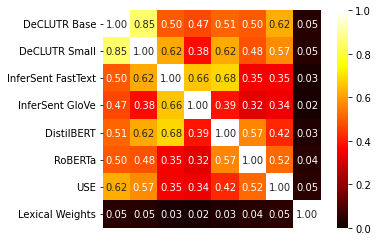

In [ ]:
sns.heatmap(corr.corr(), cmap='hot',  xticklabels=False, vmin=0, annot=True, fmt='.2f', square=True)

### christmas carol time series standardized


In [ ]:
data = pickle.load(open('a christmas carol_whole.pkl', 'rb'))

In [ ]:
df = pd.DataFrame(data[0])

In [ ]:
d2 = df[organized_labels].T

In [ ]:
from scipy.stats import zscore

In [ ]:
f = [zscore(i) for i in d2.values]

In [ ]:
f2 = np.asarray(f)

In [ ]:
x = np.linspace(1, 1941, 5, dtype=int)

In [ ]:
np.min(f2), np.max(f2)

(-3.611062577696646, 5.354870400666419)

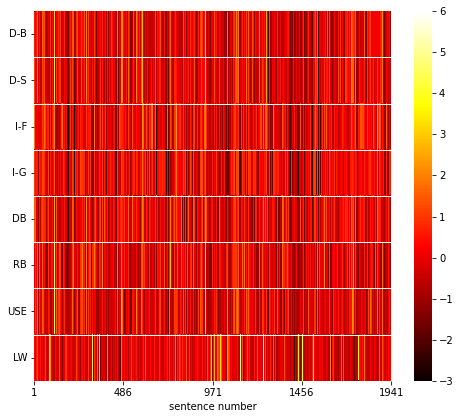

In [ ]:
plt.figure(figsize=(8,6.8))
# plt.gca().set_aspect('equal', adjustable='box')
ax = sns.heatmap(f2, cmap='hot',  xticklabels=False, yticklabels=label2, vmin = -3, vmax = 6,) #
plt.xlabel('sentence number')
plt.xticks(x, x)
for j in range(1, 8):
    ax.axhline(j, color='white', lw=1)
plt.yticks(rotation = 0)
plt.savefig('christmas carol std timeseries_final_range(-3to6).pdf', dpi = 300, bbox_inches='tight')
# plt.savefig('christmas carol std timeseries_v2.png', dpi = 300, bbox_inches='tight')
# plt.savefig('christmas carol std timeseries_v2.pdf', dpi = 300, bbox_inches='tight')

In [ ]:
np.asarray(f).shape

(8, 1941)

In [ ]:
zscore(d2.values[0])

array([-0.30942255, -1.03201352,  0.11125712, ...,  0.11282427,
       -1.16152101,  1.71373018])

### correlation of 4 books 

In [ ]:
corrs = globtastic('./corrs', file_glob='*.npy', file_re='[0-9]')

In [ ]:
corrs

(#4) ['corrs/4The Prophet_corr_ssm.npy','corrs/2Heart Of Darkness_corr_ssm.npy','corrs/1A Christmas Carol_corr_ssm.npy','corrs/3Metamorphosis_corr_ssm.npy']

In [ ]:
label2 = ['D-B', 'D-S', 'I-F', 'I-G', 'DB', 'RB', 'USE', 'LW']

In [ ]:
corrs = sorted(corrs)

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object>,
        <matplotlib.axes._subplots.AxesSubplot object>],
       [<matplotlib.axes._subplots.AxesSubplot object>,
        <matplotlib.axes._subplots.AxesSubplot object>]],
      dtype=object)

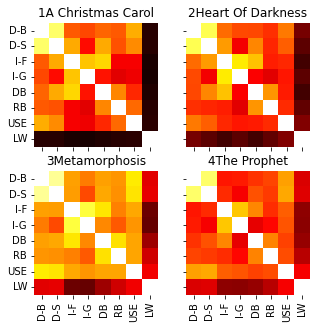

In [ ]:
x = 0
fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(5,5))
axes = axes.flatten()
for i, corr in enumerate( corrs):
    # print(i)
    f = Path(corr)
    names = f.stem.split('_corr_ssm')
    em = np.load(corr)
    x += em
    
    axes[i].set_title(names[0])
    plt.xticks(rotation=90)
    sns.heatmap(em, cmap='hot', square=True, #annot=True, fmt='.2f', 
            xticklabels=label2, yticklabels=label2,
            vmin = 0, vmax = 1, ax=axes[i], cbar=False)
    
    
    # if i%2==1:
    #     axes[i].set_yticks([])
    #     axes[i].set_xticks([])
    # plt.xticks(labels=label2)
# axes[1].set_yticks([])
# plt.savefig('2x2Corr.pdf', dpi = 300, bbox_inches='tight')

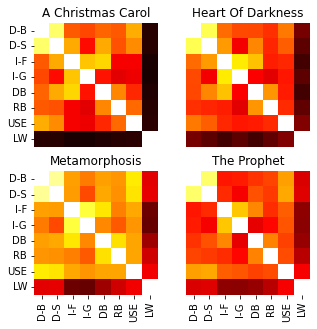

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (5, 5))
k = 0
for row in range(2):
    for col in range(2):
        em = np.load(corrs[k])
        f = Path(corrs[k])
        names = f.stem.split('_corr_ssm')
        ax[row][col].set_title(names[0][1:])
        sns.heatmap(em, cmap='hot', square=True, annot=False, fmt='.2f', 
            xticklabels=label2, yticklabels=label2,
            vmin = 0, vmax = 1, ax=ax[row][col], cbar=False, annot_kws={'fontsize':5})
        if row == 0:
            ax[row][col].set_xticks([])
        
        if col == 1:
            ax[row][col].set_yticks([])
        
        k +=1
plt.savefig('2x2Corr_v4.pdf', dpi = 300, bbox_inches='tight')

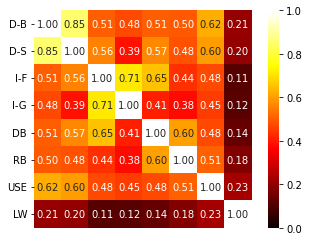

In [ ]:
sns.heatmap(x/4, cmap='hot', square=True, annot=True, fmt='.2f', 
            xticklabels=False, yticklabels=label2,
            vmin = 0, vmax = 1)
plt.yticks(rotation = 0)
plt.savefig('4book_corr_v2.pdf', dpi=300, bbox_inches='tight')

## Scatter plots


### christmas carol

In [ ]:
df.columns

Index(['DeCLUTR Base', 'DeCLUTR Small', 'DistilBERT', 'InferSent FastText',
       'InferSent GloVe', 'Lexical Weights', 'RoBERTa', 'USE'],
      dtype='object')

In [ ]:
df[df.columns[0]]

0       0.434782
1       0.345723
2       0.486630
3       0.518739
4       0.230040
          ...   
1936    0.511335
1937    0.545136
1938    0.486823
1939    0.329762
1940    0.684132
Name: DeCLUTR Base, Length: 1941, dtype: float64

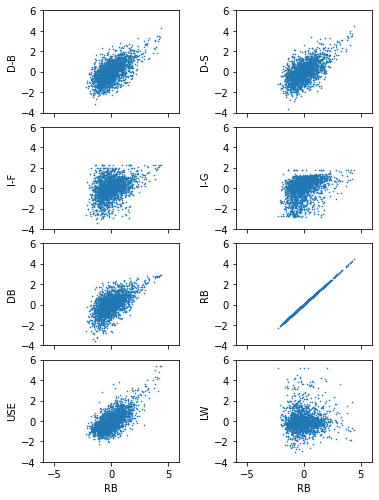

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(5.5,7), sharex=True)
k = 0
for row in range(4):
    for col in range(2):
        # ax[row][col].set_title(df.columns[k])
        y = zscore(normalize(df[organized_labels[k]]))
        x = zscore(normalize(df['RoBERTa']))
        sns.scatterplot(y=y, x=x , ax=ax[row][col], s=2, marker='o', edgecolor=None)
        ax[row][col].set_ylabel(label2[k])
        ax[row][col].set_xlabel('RB')
        ax[row][col].set_ylim([-4,  6])
        ax[row][col].set_xlim([-6,  6])
        k += 1
plt.tight_layout()
plt.savefig('scatter8.pdf', dpi=300, bbox_inches='tight')

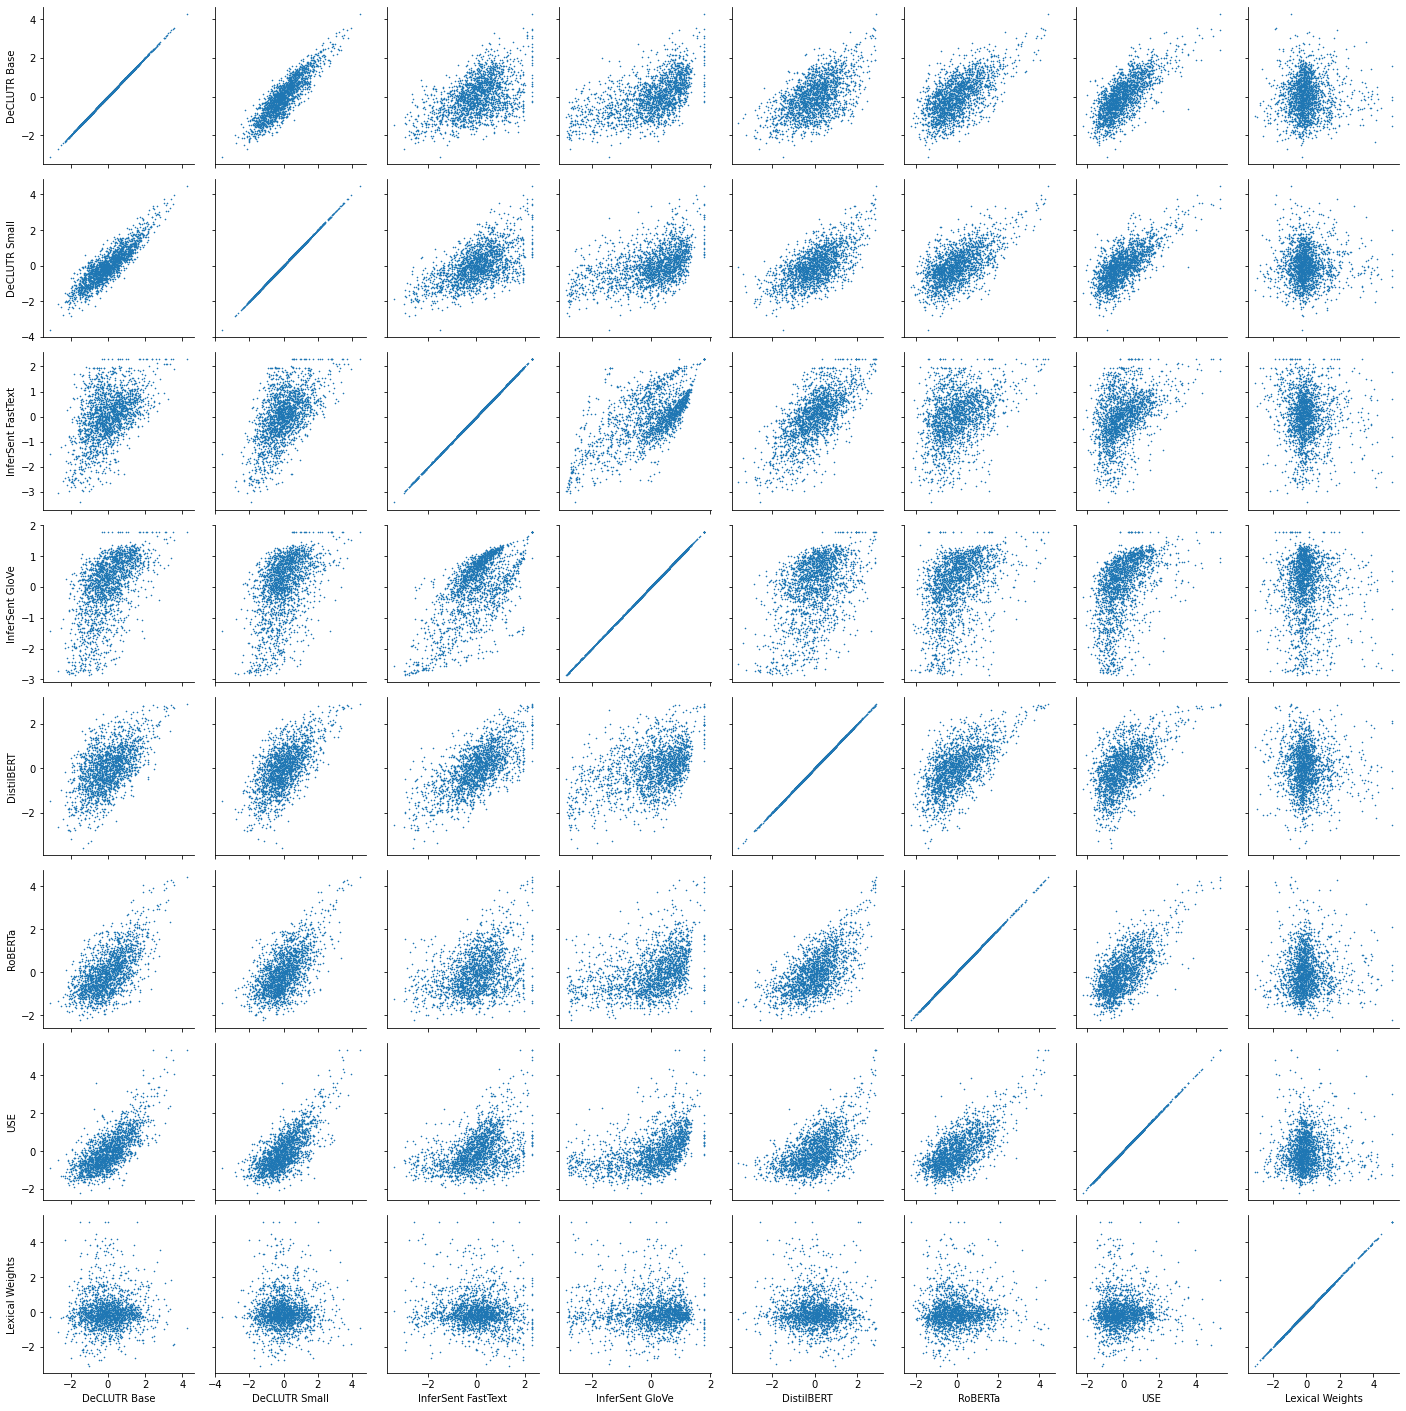

In [ ]:
data = pickle.load(open('a christmas carol_whole.pkl', 'rb'))
df = pd.DataFrame(data[0])
df = df[organized_labels]
df2 = pd.DataFrame(zscore(df, axis=0), columns=organized_labels)
g = sns.PairGrid(df2)
g.map(sns.scatterplot, s=2, marker='o', edgecolor=None)
# plt.savefig('cc-scatter.pdf', dpi=300, bbox_inches='tight')
plt.savefig('cc-scatter.png', dpi=300, bbox_inches='tight')

### metamorphosis

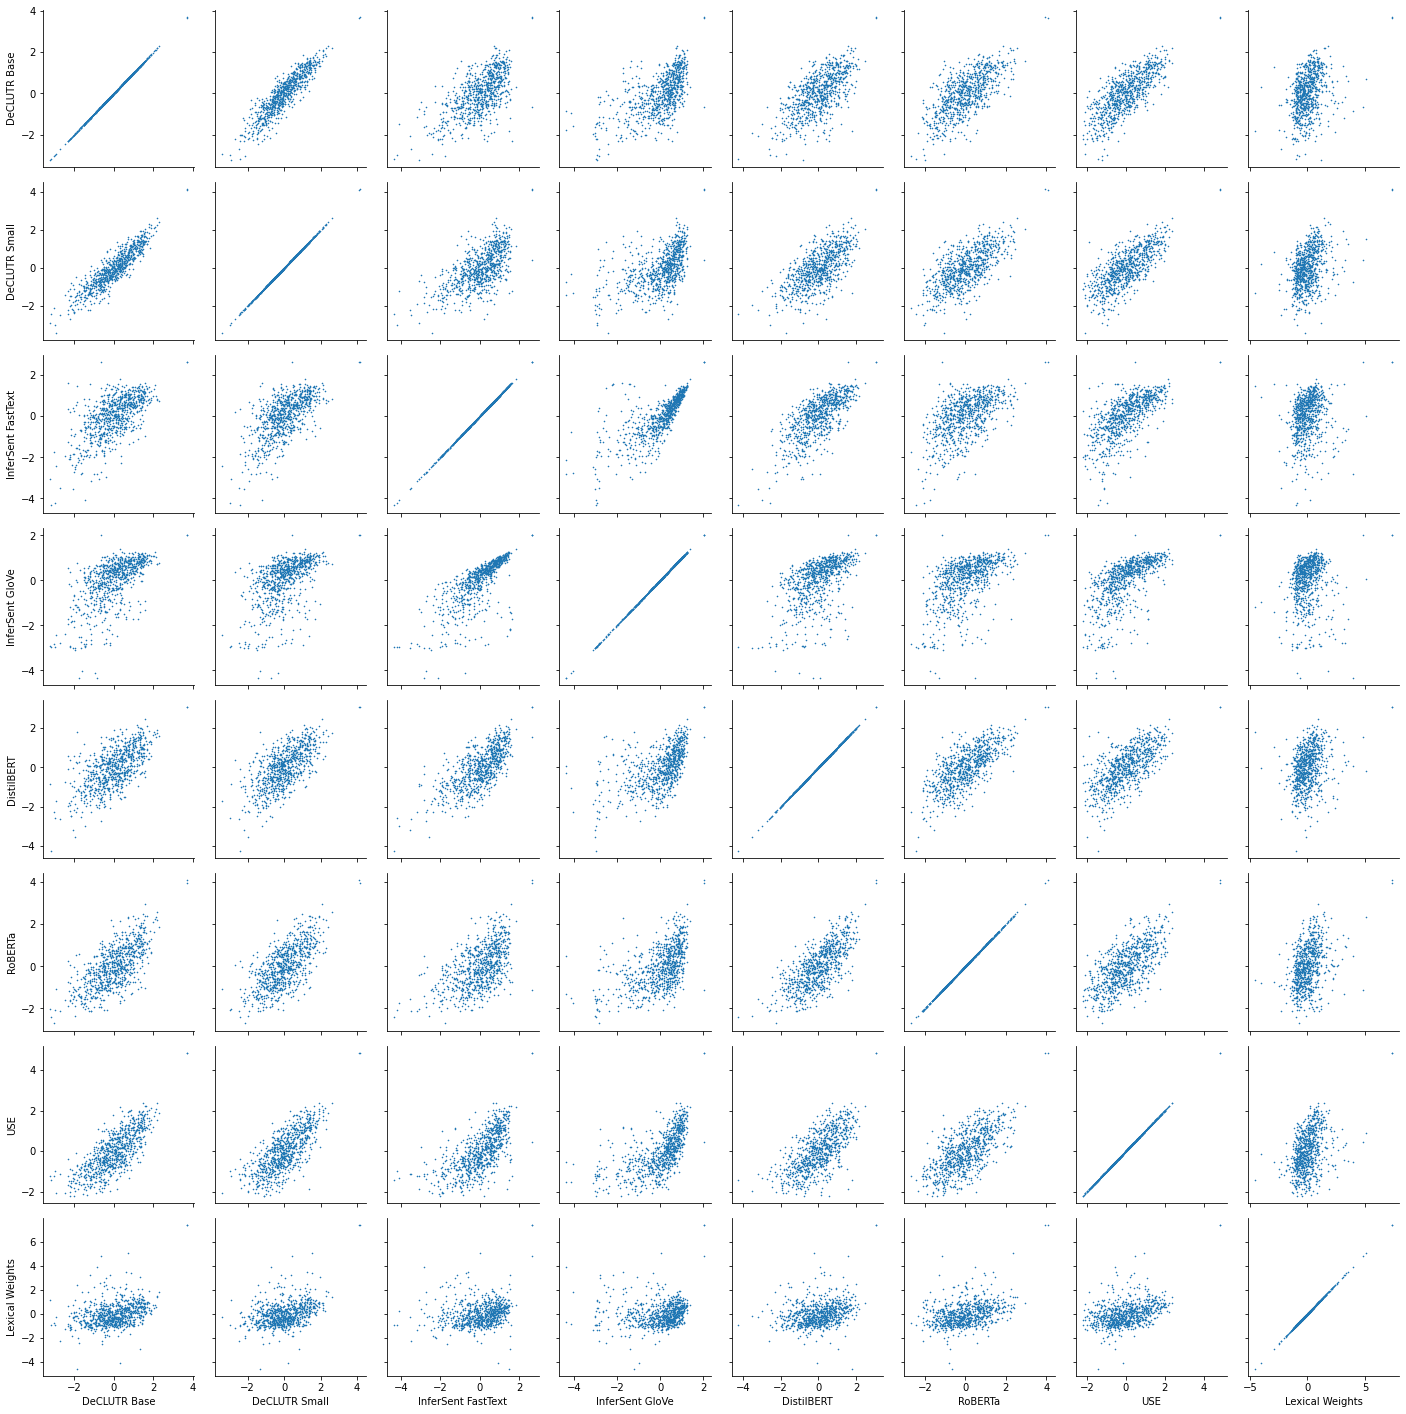

In [ ]:
data = pickle.load(open('metamorphosis_whole.pkl', 'rb'))
df = pd.DataFrame(data[0])
df = df[organized_labels]
df2 = pd.DataFrame(zscore(df, axis=0), columns=organized_labels)
g = sns.PairGrid(df2)
g.map(sns.scatterplot, s=2, marker='o', edgecolor=None)
# plt.savefig('meta-scatter.pdf', dpi=300, bbox_inches='tight')
plt.savefig('meta-scatter.png', dpi=300, bbox_inches='tight')

## heart of darkness

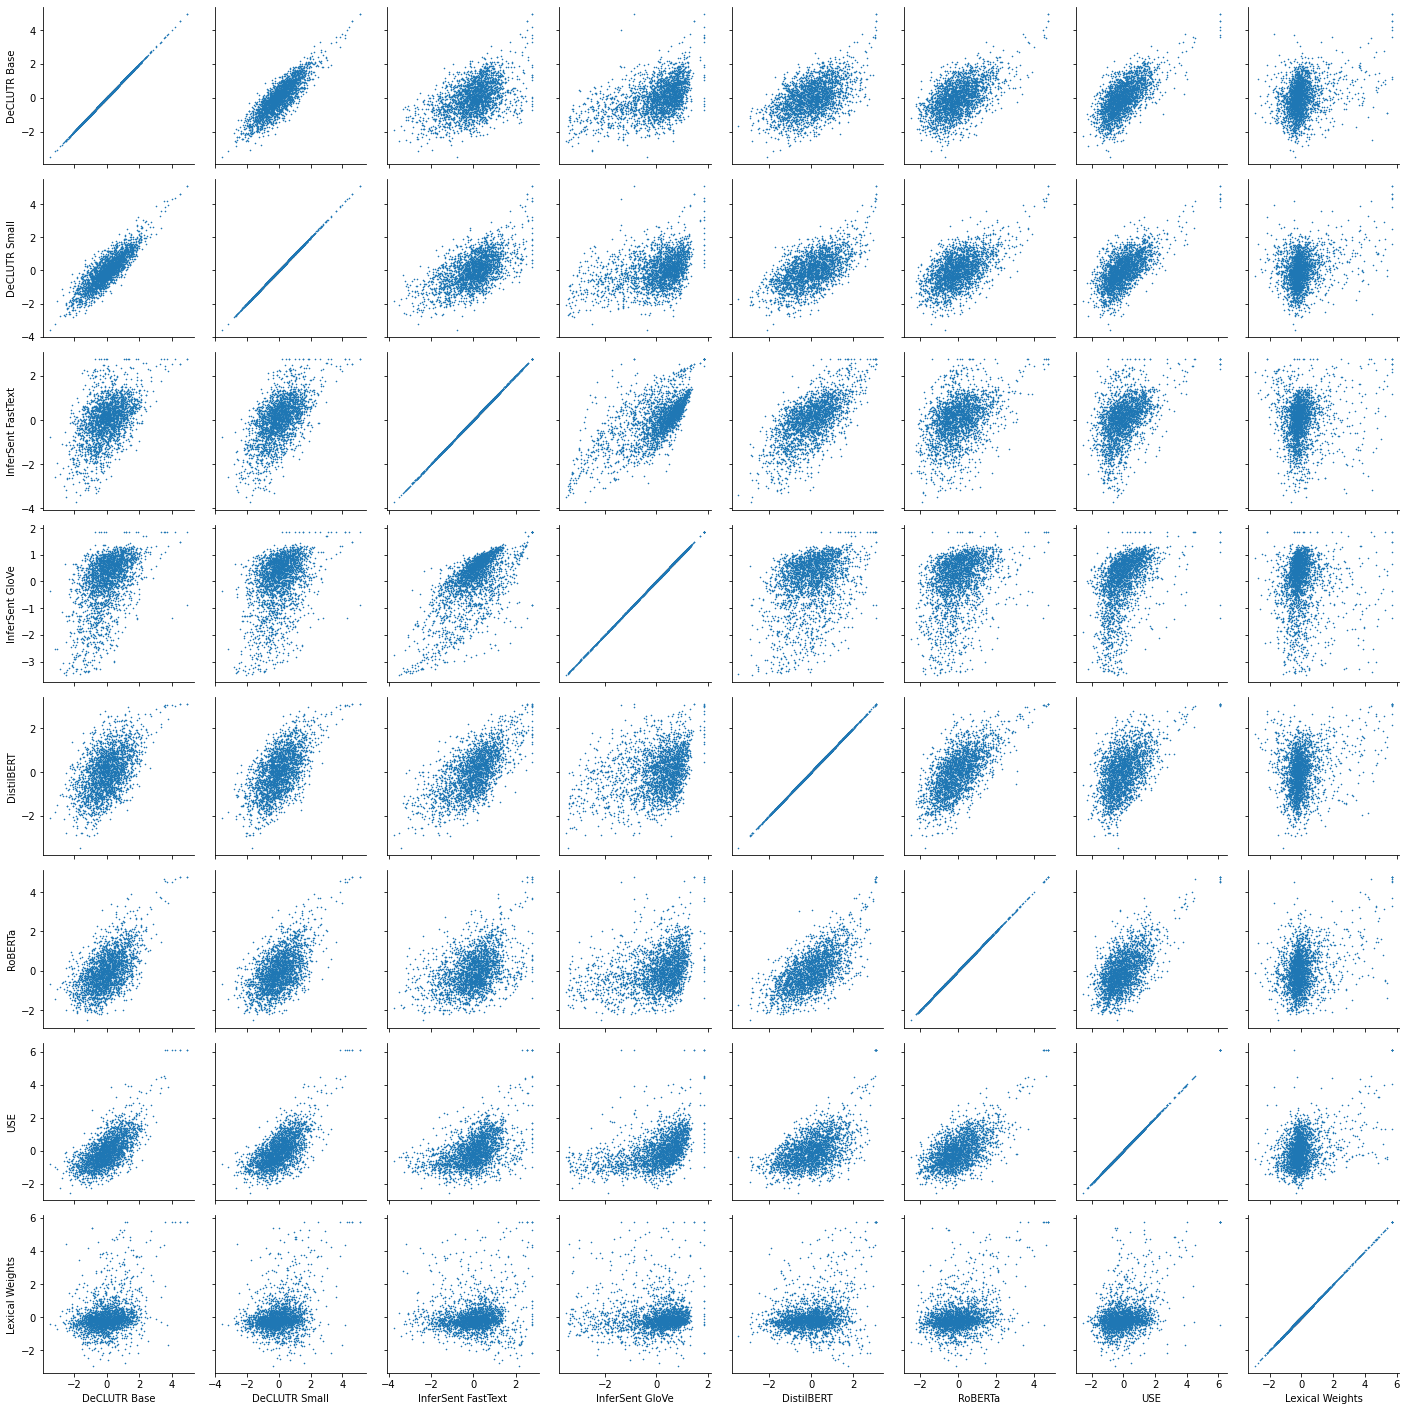

In [ ]:
data = pickle.load(open('heart of darkness_whole.pkl', 'rb'))
df = pd.DataFrame(data[0])
df = df[organized_labels]
df2 = pd.DataFrame(zscore(df, axis=0), columns=organized_labels)
g = sns.PairGrid(df2)
g.map(sns.scatterplot, s=2, marker='o', edgecolor=None)
# plt.savefig('hod-scatter.pdf', dpi=300, bbox_inches='tight')
plt.savefig('hod-scatter.png', dpi=300, bbox_inches='tight')

### prophet

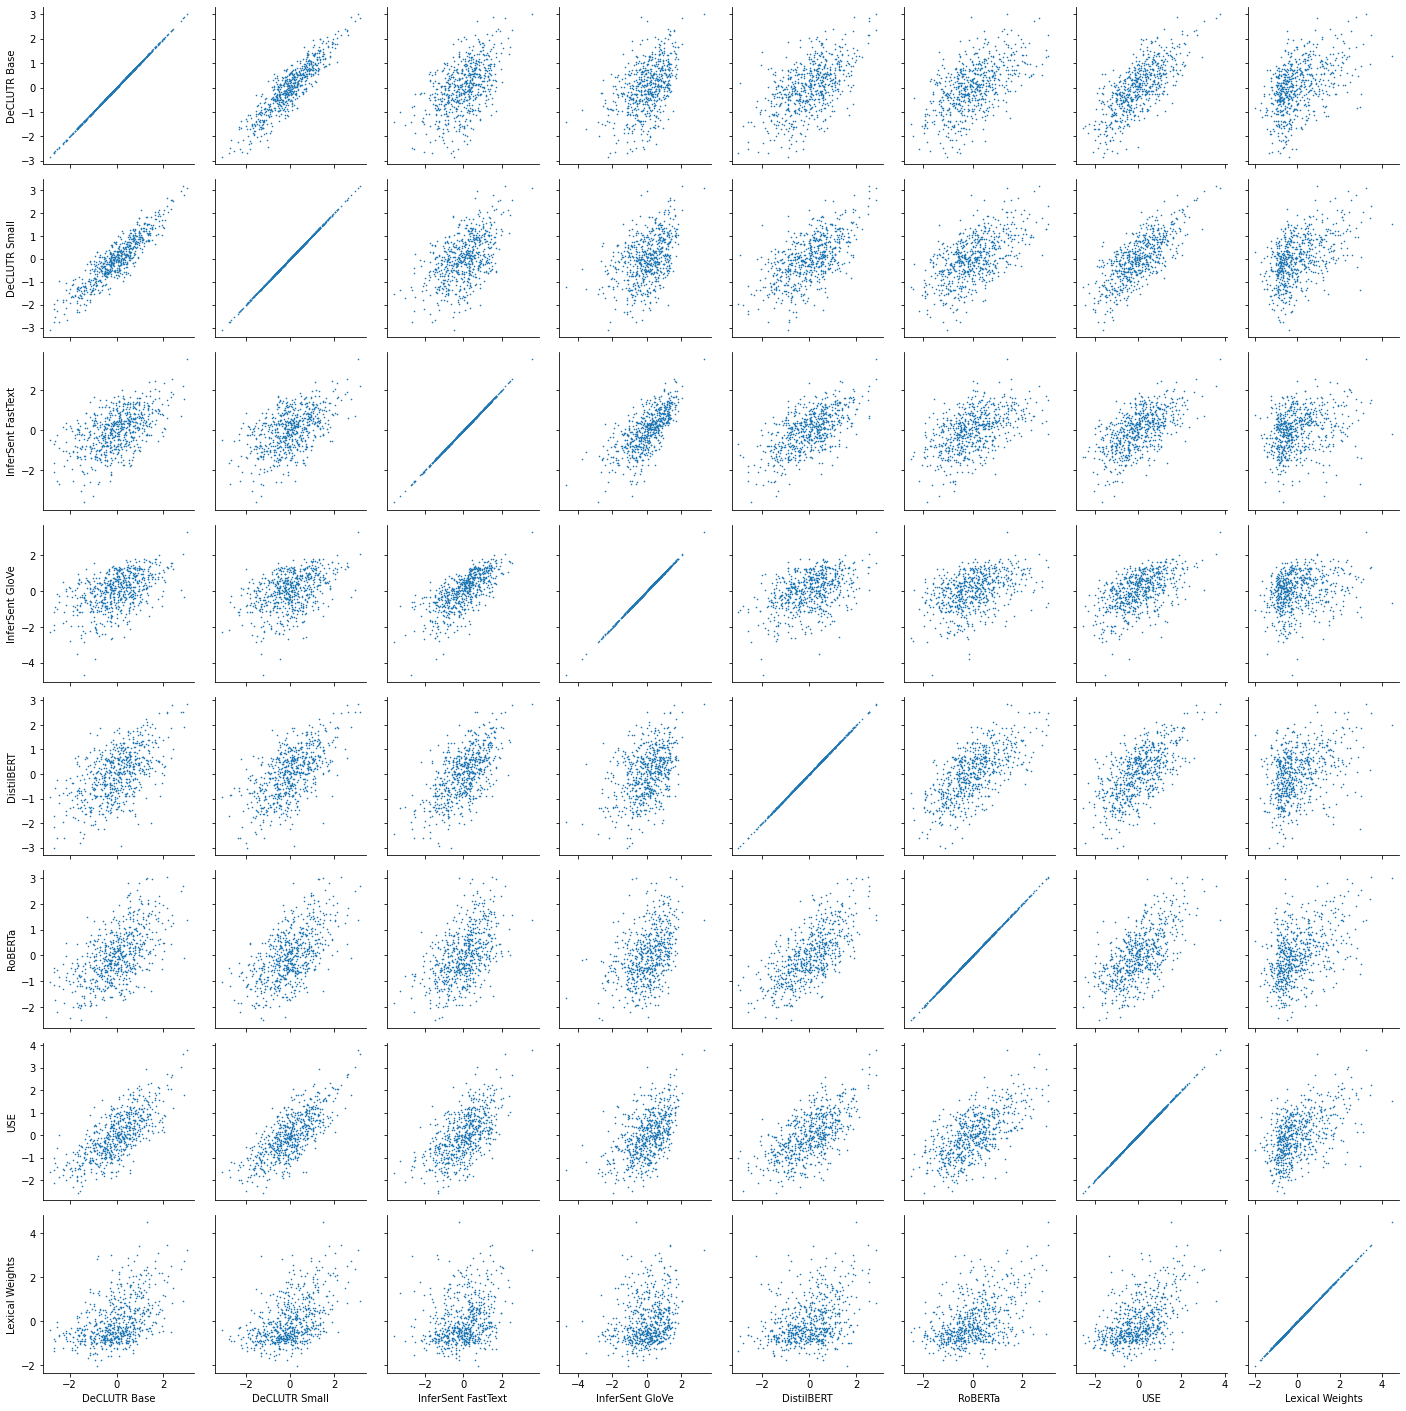

In [ ]:
data = pickle.load(open('the prophet_whole.pkl', 'rb'))
df = pd.DataFrame(data[0])
df = df[organized_labels]
df2 = pd.DataFrame(zscore(df, axis=0), columns=organized_labels)
g = sns.PairGrid(df2)
g.map(sns.scatterplot, s=2, marker='o', edgecolor=None)
# plt.savefig('pro-scatter.pdf', dpi=300, bbox_inches='tight')
plt.savefig('pro-scatter.png', dpi=300, bbox_inches='tight')

## histogram for christmas carol

In [ ]:
files

['/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/1a christmas carol_cleaned_dcltr_base.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/2a christmas carol_cleaned_dcltr_sm.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/3a christmas carol_cleaned_if_FT.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/4a christmas carol_cleaned_if_glove.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/5a christmas carol_cleaned_distil.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/6a christmas carol_cleaned_roberta.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/7a christmas carol_cleaned_use.npy',
 '/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol/8a christmas carol_cleaned_lexical_wt_ssm.npy']

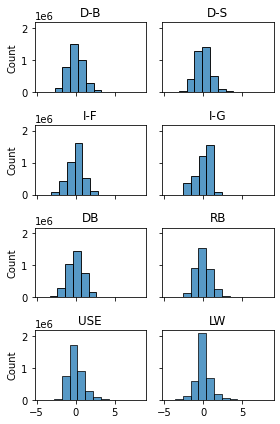

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(4,6), sharex=True, sharey=True)
k = 0
for row in range(4):
    for col in range(2):
        # ax[row][col].set_title(df.columns[k])
        x = zscore(normalize(df2[organized_labels[k]]))
        # x = zscore(normalize(df['RoBERTa']))
        sns.histplot(x, bins=7, ax=ax[row][col], binwidth=1)
        ax[row][col].set_title(label2[k])
        # ax[row][col].set_xlabel('RB')
        k += 1
        del x
plt.tight_layout()
# plt.savefig('histogram.pdf', dpi=300, bbox_inches='tight')

In [ ]:
df2 = pd.DataFrame(d)

## Standardized SSMs

In [ ]:
fc = globtastic('/content/drive/MyDrive/AAA_Thesis/final/novels/a_christmas_carol', file_glob='*.npy')

In [ ]:
cc = Path('/content/cc')
cc.mkdir()

In [ ]:
for f in fc:
    f = Path(f)
    fname = f.stem.split('_cleaned_')
    book, method = fname[0], label(fname[1])
            
    title = f'{book.title()} {method}'
    
    em = np.load(f)
    # plt.subplot(4, 2, i + 1 )
    # if start == 0:
    #     start = 1
    
    # if end == -1:
    #     end = len(em)
        
        
    # ticks = np.linspace(1, len(em), 5, dtype=int)
    # labels = np.linspace(1, len(em), 5, dtype=int)

    if fname[1] == 'lexical_wt_ssm':
        sim = em
        # print(em.shape)
        n = normalize(sim)
        np.fill_diagonal(sim, 1)
    else:
        sim = cosine_similarity(em, em)
        n = normalize(sim)
    
    numerator = n - np.mean(n)
    denominator = np.sqrt(np.sum(numerator**2) / (numerator.size - 1) )

    ab1 = numerator / denominator
    